# scikit-FIBERS: Demonstration Notebook
This notebook is set up as a demonstration for running scikit-FIBERS.

***
## Imports:

In [1]:
import os
import pickle
import pandas as pd
from sklearn.metrics import classification_report
from src.skfibers.fibers import FIBERS
from src.skfibers.experiments.survival_sim_simple import survival_data_simulation
from src.skfibers.experiments.survival_sim_simple_area import survival_data_area_simulation
from src.skfibers.experiments.survival_sim_3_groups import survival_data_simulation_3_groups

current_working_directory = os.getcwd()
print(current_working_directory)

/Users/bling/Documents/FIBERS-PURM-2024/FIBERS_working_area_pareto


***
## Set Up Local Run Parameters


In [2]:
local_save = False
folder_path = './output'
if not os.path.exists(folder_path):
        os.makedirs(folder_path)
if local_save:
    output_folder = './output'
else:
    output_folder = folder_path

***
## Generate Simulated Survial Data

In [ ]:
data_name = 'example_dataset'
data = survival_data_simulation(instances=10000, total_features=100, predictive_features=10, low_risk_proportion=0.5, threshold=2, feature_frequency_range=(0.1, 0.4), 
                         noise_frequency=0.0, class0_time_to_event_range=(1.5, 0.1), class1_time_to_event_range=(1.25, 0.1), censoring_frequency=0.2, 
                         covariates_to_sim=0, covariates_signal_range=(0.2,0.4), random_seed=41)
data.to_csv(output_folder+'/'+data_name+'.csv', index=False)
data = pd.read_csv(output_folder+'/'+data_name+'.csv')
true_risk_group = data[['TrueRiskGroup']]
data = data.drop('TrueRiskGroup', axis=1)

value_counts = true_risk_group['TrueRiskGroup'].value_counts()
print(data)

In [3]:
data_name = 'example_dataset'
data = survival_data_simulation_3_groups(instances=10000, total_features=100, predictive_features=10, low_risk_proportion=0.5, med_risk_proportion=0.25, threshold1 = 2, threshold2 = 3, feature_frequency_range=(0.1, 0.4), 
                         noise_frequency=0.0, class0_time_to_event_range=(1.5, 0.1), class1_time_to_event_range=(1.25, 0.1), class2_time_to_event_range=(1, 0.1), censoring_frequency=0.2, 
                         covariates_to_sim=0, covariates_signal_range=(0.2,0.4), random_seed=41)
data.to_csv(output_folder+'/'+data_name+'.csv', index=False)
data = pd.read_csv(output_folder+'/'+data_name+'.csv')
true_risk_group = data[['TrueRiskGroup']]
data = data.drop('TrueRiskGroup', axis=1)

value_counts = true_risk_group['TrueRiskGroup'].value_counts()
print(data)

Unique binary numbers: 1024
Unique HR Combos: 848
Unique MR Combos: 120
Unique LR Combos: 56
Target predictive feature(s) 'one's counts: [2143, 1692, 1498, 3741, 2733, 3070, 2659, 2150, 3194, 2729]


/Users/bling/Documents/FIBERS-PURM-2024/FIBERS_working_area_pareto/src/skfibers/experiments/survival_sim_3_groups.py:350: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Censoring'].iloc[index] = choice
/Users/bling/Documents/FIBERS-PURM-2

Random Number Check: 80720
      P_1  P_2  P_3  P_4  P_5  P_6  P_7  P_8  P_9  P_10  ...  R_83  R_84  \
0     0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   0.0  ...   1.0   1.0   
1     0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0   0.0  ...   0.0   0.0   
2     0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0   1.0  ...   0.0   0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   0.0   0.0   
4     0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0   0.0  ...   0.0   1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
9995  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   1.0  ...   0.0   0.0   
9996  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0  ...   0.0   1.0   
9997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...   1.0   1.0   
9998  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0  ...   1.0   0.0   
9999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   1.0  ...   0.0   0.0   

      R_85  R_86  R_87  R_88  R_89  R_90  Duration  Censorin

In [ ]:
data_name = 'example_dataset'
data = survival_data_area_simulation(instances=10000, total_features=100, predictive_features=10, survivability_features=1, low_risk_proportion=0.5, survivability_proportion=0.25, threshold=2, survivability_threshold=0, feature_frequency_range=(0.1, 0.4), 
                         noise_frequency=0.0, class0_time_to_event_range=(1.5, 0.1), class1_time_to_event_range=(1.25, 0.1), survivability_benefit=(0.1, 0.01), censoring_frequency=0.2, 
                         covariates_to_sim=0, covariates_signal_range=(0.2,0.4), random_seed=41)
data.to_csv(output_folder+'/'+data_name+'.csv', index=False)
data = pd.read_csv(output_folder+'/'+data_name+'.csv')
true_risk_group = data[['TrueRiskGroup']]
data = data.drop('TrueRiskGroup', axis=1)

value_counts = true_risk_group['TrueRiskGroup'].value_counts()
print(data)

***
## Run FIBERS (Training)

In [ ]:
#pip install -e git+https://github.com/scikit-learn/scikit-learn.git#egg=scikit-learn-0.18dev
from skfibers.fibers import FIBERS
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

# log-uniform: understand as search over p = exp(x) by varying xopt = BayesSearchCV(

X = data
y = true_risk_group
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
fibers = FIBERS(outcome_label="Duration", outcome_type="survival", iterations=50, pop_size=50, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=1.0, elitism=0.1, diversity_pressure=1, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="log_rank", log_rank_weighting=None, censor_label="Censoring", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=None, pop_clean = 'group_strata',  
                report=[0,1,2,3,4,5], random_seed=42,verbose=False)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
opt = BayesSearchCV(
  estimator=FIBERS(),
  search_spaces={
     'crossover_prob': Real(0, 1),
     'min_mutation_prob': Real(0, 1),
     'max_mutation_prob': Real(0, 1),
     'elitism': Real(0, 1)
  },
  scoring='accuracy',
  n_iter=50,
  random_state=0,
  cv=cv
 )
# executes bayesian optimization
opt.fit(X_train, y_train)
# model can be saved, used for predictions or scoring
print(opt.score(X_test, y_test))

In [ ]:

print(opt.best_estimator_)

In [ ]:
fibers = FIBERS(outcome_label="Duration", outcome_type="survival", iterations=50, pop_size=50, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=1.0, elitism=0.1, diversity_pressure=1, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="residuals", log_rank_weighting=None, censor_label="Censoring", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=None, naive_survival_optimization=False, pop_clean = 'group_strata',  
                report=[0,1,2,3,4,5], random_seed=42,verbose=False)
fibers = fibers.fit(data)

### PARETO FITNESS FIBERS

In [4]:
fibers_pareto = FIBERS(outcome_label="Duration", outcome_type="survival", iterations=50, pop_size=100, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=1.0, elitism=0.1, diversity_pressure=0, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="pareto", log_rank_weighting=None, sharing_penalization=1, censor_label="Censoring", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=None, naive_survival_optimization=False, pop_clean = 'group_strata',  
                report=[0,5,10,15,20,25,30,35,40,45,50], random_seed=42,verbose=False)
fibers_pareto = fibers_pareto.fit(data)

Dropped 0 invariant feature columns.
                                                   feature_list  \
0                                                         [P_6]   
1                                                   [P_4, R_85]   
2                            [P_6, P_9, R_19, R_74, R_87, R_90]   
3            [P_1, P_6, P_7, R_2, R_23, R_26, R_45, R_53, R_72]   
4           [P_4, P_5, R_18, R_2, R_20, R_45, R_55, R_66, R_68]   
5      [P_4, P_7, R_1, R_14, R_45, R_50, R_63, R_73, R_75, R_8]   
6                                             [P_9, R_67, R_77]   
7            [P_4, P_5, R_13, R_24, R_33, R_4, R_5, R_65, R_67]   
8                                                   [P_7, R_87]   
9    [P_6, P_9, R_15, R_20, R_28, R_37, R_64, R_75, R_81, R_89]   
10                                            [P_9, R_18, R_81]   
11           [P_5, P_6, R_30, R_38, R_46, R_61, R_65, R_7, R_9]   
12                                      [P_9, R_37, R_46, R_76]   
13   [P_2, P_9, R_23, R_3

  6%|▌         | 3/50 [00:22<05:49,  7.44s/it]

increasing elitism!


 10%|█         | 5/50 [00:25<02:58,  3.97s/it]

increasing elitism!
ITERATION: 5
                              feature_list  group_threshold   fitness  \
0                          [P_4, P_6, P_7]                0  1.000000   
1                          [P_4, P_6, P_9]                0  0.975431   
2                          [P_1, P_4, P_7]                0  0.951466   
3                    [P_4, P_6, P_8, R_23]                0  0.928090   
4               [P_4, P_6, P_7, P_9, R_39]                0  0.905288   
5               [P_1, P_3, P_4, P_9, R_53]                0  0.883046   
6                     [P_4, P_6, P_7, P_9]                1  0.861351   
7               [P_1, P_4, P_6, P_7, R_19]                1  0.840188   
8               [P_4, P_6, P_7, P_9, R_19]                1  0.819546   
9          [P_1, P_3, P_4, P_6, P_8, R_19]                1  0.799411   
10         [P_1, P_4, P_6, P_7, P_9, R_53]                1  0.779770   
11   [P_1, P_4, P_6, P_7, P_9, R_23, R_47]                1  0.760612   
12               [

 12%|█▏        | 6/50 [00:27<02:16,  3.10s/it]

increasing elitism!


 14%|█▍        | 7/50 [00:28<01:53,  2.63s/it]

increasing elitism!


 16%|█▌        | 8/50 [00:30<01:37,  2.32s/it]

increasing elitism!


 18%|█▊        | 9/50 [00:32<01:26,  2.11s/it]

increasing elitism!


 20%|██        | 10/50 [00:33<01:19,  1.98s/it]

increasing elitism!
ITERATION: 10
                                          feature_list  group_threshold  \
0                            [P_1, P_3, P_4, P_6, P_7]                0   
1                       [P_1, P_3, P_6, P_7, P_8, P_9]                0   
2                 [P_1, P_3, P_4, P_6, P_7, P_8, R_79]                0   
3           [P_1, P_3, P_4, P_6, P_7, P_9, R_45, R_53]                0   
4                            [P_4, P_6, P_7, P_8, P_9]                1   
5                       [P_3, P_4, P_6, P_7, P_8, P_9]                1   
6            [P_1, P_3, P_4, P_6, P_7, P_8, P_9, R_85]                1   
7            [P_1, P_3, P_4, P_6, P_7, P_8, P_9, R_45]                1   
8      [P_1, P_3, P_4, P_6, P_7, P_8, P_9, R_45, R_53]                1   
9                            [P_1, P_4, P_6, P_7, P_9]                2   
10                     [P_4, P_6, P_7, P_8, P_9, R_19]                2   
11                     [P_4, P_6, P_7, P_8, P_9, R_83]            

 22%|██▏       | 11/50 [00:35<01:13,  1.89s/it]

increasing elitism!


 24%|██▍       | 12/50 [00:37<01:09,  1.83s/it]

increasing elitism!


 26%|██▌       | 13/50 [00:38<01:05,  1.76s/it]

increasing elitism!


 28%|██▊       | 14/50 [00:40<01:02,  1.75s/it]

increasing elitism!


 30%|███       | 15/50 [00:42<00:59,  1.71s/it]

increasing elitism!
ITERATION: 15
                                                   feature_list  \
0                                [P_1, P_3, P_4, P_6, P_7, P_9]   
1                          [P_1, P_3, P_4, P_6, P_7, P_8, R_67]   
2                          [P_1, P_3, P_4, P_6, P_7, P_8, R_75]   
3                          [P_1, P_3, P_4, P_6, P_7, P_9, R_53]   
4                    [P_1, P_3, P_4, P_6, P_7, P_8, R_75, R_85]   
5                     [P_1, P_3, P_4, P_6, P_7, P_8, P_9, R_53]   
6               [P_1, P_3, P_4, P_6, P_7, P_8, P_9, R_33, R_75]   
7               [P_1, P_3, P_4, P_6, P_7, P_8, P_9, R_33, R_78]   
8   [P_1, P_3, P_4, P_6, P_7, P_8, P_9, R_29, R_33, R_75, R_85]   
9                                     [P_4, P_6, P_7, P_8, P_9]   
10                               [P_3, P_4, P_6, P_7, P_8, P_9]   
11                          [P_1, P_3, P_4, P_6, P_7, P_8, P_9]   
12                    [P_1, P_3, P_4, P_6, P_7, P_8, P_9, R_85]   
13                    [P_1, 

 32%|███▏      | 16/50 [00:43<00:58,  1.73s/it]

increasing elitism!


 34%|███▍      | 17/50 [00:45<00:56,  1.71s/it]

increasing elitism!


 36%|███▌      | 18/50 [00:47<00:54,  1.71s/it]

increasing elitism!


 38%|███▊      | 19/50 [00:48<00:52,  1.70s/it]

increasing elitism!


 40%|████      | 20/50 [00:50<00:50,  1.69s/it]

increasing elitism!
ITERATION: 20
                                                        feature_list  \
0                                     [P_1, P_2, P_3, P_4, P_6, P_7]   
1                                [P_1, P_2, P_3, P_4, P_6, P_7, P_9]   
2                           [P_1, P_2, P_3, P_4, P_6, P_7, P_8, P_9]   
3                          [P_1, P_2, P_3, P_4, P_6, P_7, P_8, R_67]   
4                          [P_1, P_2, P_3, P_4, P_6, P_7, P_9, R_42]   
5                          [P_1, P_2, P_3, P_4, P_6, P_7, P_9, R_76]   
6                          [P_1, P_2, P_3, P_4, P_6, P_7, P_9, R_33]   
7                    [P_1, P_2, P_3, P_4, P_6, P_7, P_8, R_35, R_67]   
8                     [P_1, P_2, P_3, P_4, P_6, P_7, P_8, P_9, R_33]   
9                     [P_1, P_2, P_3, P_4, P_6, P_7, P_9, R_3, R_33]   
10                   [P_1, P_2, P_3, P_4, P_6, P_7, P_9, R_33, R_78]   
11              [P_1, P_2, P_3, P_4, P_6, P_7, P_9, R_3, R_33, R_75]   
12  [P_1, P_2, P_3, P_4, P_6, 

 42%|████▏     | 21/50 [00:52<00:49,  1.69s/it]

increasing elitism!


 44%|████▍     | 22/50 [00:53<00:46,  1.66s/it]

increasing elitism!


 46%|████▌     | 23/50 [00:55<00:44,  1.66s/it]

increasing elitism!


 48%|████▊     | 24/50 [00:57<00:42,  1.65s/it]

increasing elitism!


 50%|█████     | 25/50 [00:58<00:41,  1.66s/it]

increasing elitism!
ITERATION: 25
                                                                             feature_list  \
0                                         [P_1, P_10, P_2, P_3, P_4, P_6, P_7, P_9, R_35]   
1                                        [P_1, P_10, P_2, P_3, P_4, P_6, P_7, R_35, R_39]   
2                       [P_1, P_10, P_2, P_3, P_4, P_6, P_7, P_9, R_35, R_39, R_49, R_82]   
3                  [P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8, R_29, R_33, R_35, R_47, R_75]   
4   [P_1, P_2, P_3, P_4, P_6, P_7, P_8, P_9, R_29, R_33, R_4, R_48, R_5, R_67, R_7, R_83]   
5                                                [P_1, P_2, P_3, P_4, P_6, P_7, P_8, P_9]   
6                                          [P_1, P_2, P_3, P_4, P_6, P_7, P_8, P_9, R_59]   
7                                          [P_1, P_2, P_3, P_4, P_6, P_7, P_8, P_9, R_75]   
8                                          [P_1, P_2, P_3, P_4, P_6, P_7, P_8, P_9, R_87]   
9                                   

 52%|█████▏    | 26/50 [01:00<00:40,  1.67s/it]

increasing elitism!


 54%|█████▍    | 27/50 [01:02<00:38,  1.67s/it]

increasing elitism!


 56%|█████▌    | 28/50 [01:03<00:36,  1.67s/it]

increasing elitism!


 58%|█████▊    | 29/50 [01:05<00:34,  1.66s/it]

increasing elitism!


 60%|██████    | 30/50 [01:07<00:33,  1.66s/it]

increasing elitism!
ITERATION: 30
                                                                                                                    feature_list  \
0                                                                                [P_1, P_10, P_2, P_3, P_4, P_6, P_7, P_9, R_35]   
1                                                                               [P_1, P_10, P_2, P_3, P_4, P_6, P_7, R_35, R_39]   
2                                                  [P_1, P_10, P_2, P_3, P_5, P_6, P_7, P_9, R_28, R_29, R_33, R_35, R_39, R_49]   
3                                 [P_1, P_10, P_2, P_3, P_4, P_5, P_7, P_9, R_16, R_32, R_33, R_34, R_35, R_4, R_47, R_51, R_52]   
4                           [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_9, R_25, R_29, R_35, R_39, R_4, R_44, R_49, R_65, R_77, R_84]   
5                                                               [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, P_9, R_35, R_52, R_76]   
6                                         

 62%|██████▏   | 31/50 [01:08<00:31,  1.66s/it]

increasing elitism!


 64%|██████▍   | 32/50 [01:10<00:29,  1.64s/it]

increasing elitism!


 66%|██████▌   | 33/50 [01:12<00:27,  1.64s/it]

increasing elitism!


 68%|██████▊   | 34/50 [01:13<00:26,  1.64s/it]

increasing elitism!


 70%|███████   | 35/50 [01:15<00:24,  1.62s/it]

increasing elitism!
ITERATION: 35
                                                                                                                               feature_list  \
0                                                                                    [P_1, P_10, P_2, P_3, P_5, P_6, P_7, R_35, R_39, R_82]   
1                                                                         [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, R_35, R_39, R_52, R_82]   
2                                                                    [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, P_9, R_35, R_39, R_52, R_82]   
3                                                             [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_9, R_28, R_35, R_39, R_47, R_49, R_75]   
4                                                             [P_1, P_10, P_2, P_3, P_5, P_6, P_7, P_9, R_28, R_29, R_33, R_35, R_39, R_49]   
5                                                         [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, P_9, R_2

 72%|███████▏  | 36/50 [01:16<00:22,  1.63s/it]

increasing elitism!


 74%|███████▍  | 37/50 [01:18<00:21,  1.65s/it]

increasing elitism!


 76%|███████▌  | 38/50 [01:20<00:19,  1.65s/it]

increasing elitism!


 78%|███████▊  | 39/50 [01:21<00:18,  1.65s/it]

increasing elitism!


 80%|████████  | 40/50 [01:23<00:16,  1.64s/it]

increasing elitism!
ITERATION: 40
                                                                                      feature_list  \
0                                                 [P_1, P_10, P_2, P_3, P_5, P_6, P_9, R_35, R_39]   
1                                           [P_1, P_10, P_2, P_3, P_5, P_6, P_9, R_35, R_39, R_49]   
2                                            [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_9, R_35, R_39]   
3                                           [P_1, P_10, P_2, P_3, P_5, P_6, P_9, R_35, R_39, R_82]   
4                                      [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_9, R_35, R_39, R_49]   
5                                      [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, R_35, R_39, R_82]   
6                                      [P_1, P_10, P_2, P_3, P_5, P_6, P_7, P_9, R_33, R_35, R_39]   
7                                [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, R_35, R_39, R_52, R_82]   
8                                [P_1, P_10, P_2

 82%|████████▏ | 41/50 [01:25<00:14,  1.61s/it]

increasing elitism!


 84%|████████▍ | 42/50 [01:26<00:12,  1.62s/it]

increasing elitism!


 86%|████████▌ | 43/50 [01:28<00:11,  1.62s/it]

increasing elitism!


 88%|████████▊ | 44/50 [01:30<00:09,  1.63s/it]

increasing elitism!


 90%|█████████ | 45/50 [01:31<00:08,  1.64s/it]

increasing elitism!
ITERATION: 45
                                                                                      feature_list  \
0                                                 [P_1, P_10, P_2, P_3, P_5, P_6, P_9, R_35, R_39]   
1                                           [P_1, P_10, P_2, P_3, P_5, P_6, P_9, R_35, R_39, R_49]   
2                                            [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_9, R_35, R_39]   
3                                           [P_1, P_10, P_2, P_3, P_5, P_6, P_9, R_35, R_39, R_82]   
4                                      [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_9, R_35, R_39, R_49]   
5                                      [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, R_35, R_39, R_82]   
6                                      [P_1, P_10, P_2, P_3, P_5, P_6, P_7, P_9, R_33, R_35, R_39]   
7                                [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, R_35, R_39, R_52, R_82]   
8                                [P_1, P_10, P_2

 92%|█████████▏| 46/50 [01:33<00:06,  1.68s/it]

increasing elitism!


 94%|█████████▍| 47/50 [01:35<00:04,  1.67s/it]

increasing elitism!


 96%|█████████▌| 48/50 [01:36<00:03,  1.66s/it]

increasing elitism!


 98%|█████████▊| 49/50 [01:46<00:03,  3.94s/it]

increasing elitism!


100%|██████████| 50/50 [01:47<00:00,  2.15s/it]

ITERATION: 50
                                                                                      feature_list  \
0                                                 [P_1, P_10, P_2, P_3, P_5, P_6, P_9, R_35, R_39]   
1                                           [P_1, P_10, P_2, P_3, P_5, P_6, P_9, R_35, R_39, R_49]   
2                                            [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_9, R_35, R_39]   
3                                           [P_1, P_10, P_2, P_3, P_5, P_6, P_9, R_35, R_39, R_82]   
4                                      [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_9, R_35, R_39, R_49]   
5                                      [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, R_35, R_39, R_82]   
6                                      [P_1, P_10, P_2, P_3, P_5, P_6, P_7, P_9, R_33, R_35, R_39]   
7                                [P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, R_35, R_39, R_52, R_82]   
8                                [P_1, P_10, P_2, P_3, P_4, P_5, P_6

### RUN PARETO FITNESS FIBERS

In [ ]:
import matplotlib.pyplot as plt

seed_values = range(50)
original_values = []
modified_values = []

for x in range(50):
  print("TRAINING ITERATION: ", x)
  data_name = 'example_dataset'
  data = survival_data_simulation(instances=10000, total_features=100, predictive_features=10, low_risk_proportion=0.5, threshold = 2, feature_frequency_range=(0.1, 0.4), 
                          noise_frequency=0.0, class0_time_to_event_range=(1.5, 0.2), class1_time_to_event_range=(1, 0.2), censoring_frequency=0.2, 
                          covariates_to_sim=0, covariates_signal_range=(0.2,0.4), random_seed=x)
  data.to_csv(output_folder+'/'+data_name+'.csv', index=False)
  data = pd.read_csv(output_folder+'/'+data_name+'.csv')
  true_risk_group = data[['TrueRiskGroup']]
  data = data.drop('TrueRiskGroup', axis=1)
  value_counts = true_risk_group['TrueRiskGroup'].value_counts()

  fibers_modified = FIBERS(outcome_label="Duration", outcome_type="survival", iterations=50, pop_size=50, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=1.0, elitism=0.1, diversity_pressure=0, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="log_rank", log_rank_weighting=None, censor_label="Censoring", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=None, naive_survival_optimization=True, pop_clean = 'group_strata',  
                report=[], random_seed=42,verbose=False)
  fibers_modified = fibers_modified.fit(data)

  modified_values.append(fibers_modified.get_top_log_rank_score())

  fibers = FIBERS(outcome_label="Duration", outcome_type="survival", iterations=50, pop_size=50, tournament_prop=0.2, crossover_prob=0.5, min_mutation_prob=0.1, max_mutation_prob=0.5, merge_prob=0.1, 
                new_gen=1.0, elitism=0.1, diversity_pressure=0, min_bin_size=1, max_bin_size=None, max_bin_init_size=10, fitness_metric="log_rank", log_rank_weighting=None, censor_label="Censoring", 
                group_strata_min=0.2, penalty=0.5, group_thresh=None, min_thresh=0, max_thresh=5, int_thresh=True, thresh_evolve_prob=0.5, manual_bin_init=None, covariates=None, naive_survival_optimization=False, pop_clean = 'group_strata',  
                report=[], random_seed=42,verbose=False)
  fibers = fibers.fit(data)
  original_values.append(fibers.get_top_log_rank_score())

In [ ]:
seed_values = range(48)
plt.plot(seed_values, modified_values[:48], label="modified fibers")
plt.plot(seed_values, original_values[:48], label="original fibers")

plt.xlabel("random seed survival data")
plt.ylabel("top bin log rank score")
plt.title('Modified vs Original Fibers Log Rank Scores')
plt.legend(loc='best')
plt.show()

### PICKLED PARETO MODEL

In [ ]:
import pickle as pickle
fibers_pareto = pickle.load(open(output_folder+'/'+data_name+'.pickle', 'rb'))

### Report Run Time

In [ ]:
# Report run time
print(fibers.elapsed_time)
# Report run time
print(fibers_modified.elapsed_time)

***
## Top (or Target) Bin Examination
### Specify Bin to Examine

In [ ]:
bin_index = 0 # lowest index is the bin with the highest fitness (only reports the bin ranked at the top, despite possible fitness ties for top)

In [5]:
fibers_pareto.get_pareto_front_report()

,Features in Bin:,Threshold:,Fitness,Pre-Fitness:,Log-Rank Score:,Low Risk Area:,Bin Size:,Group Ratio:,Count At/Below Threshold:,Count Above Threshold:
0,"[P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, P_9, R_29, R_35, R_49]",1,0.655154,1.0,1474.065991,1.523462,12,0.2982,2982,7018
1,"[P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, P_9, R_33, R_35, R_39]",1,0.639057,1.0,1172.882280,1.523668,12,0.2651,2651,7349
2,"[P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, P_9, R_28, R_29, R_33, R_49]",1,0.623356,1.0,929.428906,1.525013,13,0.2271,2271,7729
3,"[P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, P_9, R_28, R_33, R_35, R_39]",1,0.608041,1.0,911.688013,1.526401,13,0.2196,2196,7804
4,"[P_1, P_10, P_2, P_3, P_4, P_5, P_6, P_7, P_9, R_28, R_29, R_33, R_35, R_39]",1,0.593102,1.0,822.929584,1.527714,14,0.2027,2027,7973
5,"[P_1, P_3, P_4, P_6, P_7, P_8, P_9]",2,0.550452,1.0,7395.666551,1.456142,7,0.3163,6837,3163
6,"[P_2, P_3, P_4, P_6, P_7, P_8, P_9]",2,0.536928,1.0,7706.693495,1.453950,7,0.3076,6924,3076
7,"[P_1, P_10, P_2, P_3, P_4, P_6, P_7, P_9]",2,0.523737,1.0,7096.488052,1.471487,8,0.3687,6313,3687
8,"[P_1, P_2, P_3, P_4, P_6, P_7, P_8, P_9]",2,0.510869,1.0,7332.840152,1.470662,8,0.3647,6353,3647
9,"[P_1, P_10, P_2, P_3, P_4, P_6, P_7, P_8, P_9, R_35]",2,0.498318,1.0,5660.336255,1.493884,10,0.4522,5478,4522


### Get Bin Details

/Users/bling/Documents/FIBERS-PURM-2024/FIBERS_working_area_pareto/src/skfibers/methods/pareto.py:329: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1.25, 1), fontsize='small')


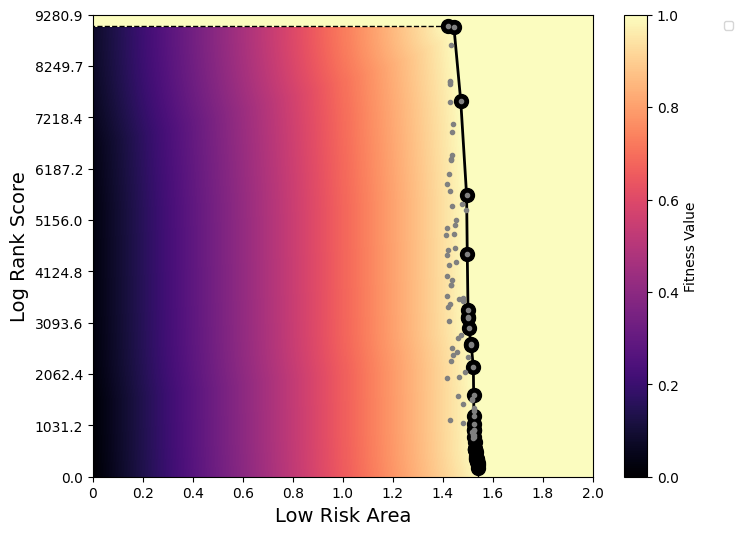

In [6]:
#fibers_pareto.get_bin_report(6)
fibers_pareto.get_fitness_pareto_plot(output_folder, data_name)

### Plot: Kaplan Meier Survival Curves For Each Group Defined by the Target Bin

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

low_outcome, high_outcome, low_censor, high_censor = fibers.get_bin_groups(data, bin_index)
low_outcome_modified, high_outcome_modified, low_censor_modified, high_censor_modified = fibers_pareto.get_bin_groups(data, bin_index)

kmf1 = KaplanMeierFitter()
# fit the model for 1st cohort
kmf1.fit(low_outcome, low_censor, label='normal low risk')
a1 = kmf1.plot_survival_function()
a1.set_ylabel('Survival Probability')

# fit the model for 2nd cohort
kmf1.fit(low_outcome_modified, low_censor_modified, label='optimized low risk')
kmf1.plot_survival_function(ax=a1)
a1.set_xlabel('Time After Event')
plt.show()

In [ ]:

bin_index=0
fibers_pareto.get_kaplan_meir(data,bin_index,save=True,output_folder=output_folder,data_name=data_name)

### Check and View Any Top Bin Ties

In [ ]:
fibers_pareto.report_ties()


***
## Bin Population Examination
### Plot: Basic Bin Population Heatmap


In [ ]:
fibers.get_bin_population_heatmap_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Custom Bin Population Heatmap

In [ ]:
group_names=["P", "R"]
legend_group_info = ['Not in Bin','Non-Predictive Feature in Bin','Predictive Feature in Bin'] #2 default colors first followed by additional color descriptions in legend
color_features = [['P_1','P_2','P_3','P_4','P_5','P_6','P_7','P_8','P_9','P_10']]
colors = [(1, 0, 0)] # red ---Alternatively orange (1, 0.5, 0)
default_colors = [(.95, .95, 1),(0, 0, 1)] #very light blue and blue
max_bins = 100
max_features = 100

fibers.get_custom_bin_population_heatmap_plot(group_names,legend_group_info,color_features,colors,default_colors,max_bins,max_features,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Population Pareto Front
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
fibers.get_pareto_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Estimated Feature Tracking Scores
These scores accumulate throughout the training process, and do not nesessarily reflect feature importance of individual bins or the final bin population.

In [ ]:
fibers.get_feature_tracking_plot(max_features=50,save=True,output_folder=output_folder,data_name=data_name)

### Plot: Dataset Covariate Residuals (if applicable)

In [ ]:
if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':  
    fibers.get_residuals_histogram(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Log-Rank Scores Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if fibers.fitness_metric == 'log_rank_residuals':
    fibers.get_log_rank_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

###  Evaluate All Bins in Population using Cox PH Model (Can be slow)

In [ ]:
have_covariates = False
#if have_covariates:
#    fibers.calculate_cox_prop_hazards(data)
fibers.calculate_cox_prop_hazards(data)

### Plot: Bin Log-Rank Scores Vs. Adjusted Hazard Ratios (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
have_covariates = True
if have_covariates:
    if fibers.fitness_metric == 'log_rank' or fibers.fitness_metric == 'log_rank_residuals':  
        fibers.get_log_rank_adj_HR_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if have_covariates:
    if fibers.fitness_metric == 'residuals' or fibers.fitness_metric == 'log_rank_residuals':   
        fibers.get_adj_HR_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Bin Adjusted Hazard Ratios Vs. Log Rank * Residuals Scores (if applicable)
In plot, dot colors indicate the 'group strata prop' of the given bin, and dot size is relative to the 'group threshold of that bin'.

In [ ]:
if have_covariates:
    if fibers.fitness_metric == 'log_rank_residuals':   
        fibers.get_adj_HR_metric_product_plot(save=True,output_folder=output_folder,data_name=data_name)

***
## History of Bin Evolution (Top Bin Each Generation)
### Plot: Pre-Fitness of top bin across training iterations

In [ ]:
fibers.get_perform_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Threshold of top bin across training iterations

In [ ]:
fibers.get_threshold_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Normalized Top-Bin Stats Across Training Iterations

In [ ]:
fibers.get_misc_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### View Top Bin Information Across all Iterations/Generations

In [ ]:
fibers.perform_track_df
fibers.perform_track_df.to_csv(output_folder+'/'+'Tracking_'+data_name+'.csv', index=False)

***
## Save Bin Population
### Save Bin Population Details to CSV

In [ ]:
pop_df = fibers.get_pop()
pop_df.to_csv(output_folder+'/'+'Pop_'+data_name+'.csv', index=False)

### Pickle Trained FIBERS Object (For Future Use)

In [ ]:
model_name = "pareto"
with open(output_folder+'/'+model_name+'.pickle', 'wb') as f:
    pickle.dump(fibers_pareto, f)

***
## Transforming Bins Into New Features (i.e. Feature Learning) and Save as New CSV Files
### Transform Bins Using Total Sums (i.e. Respective Bin Thresholds Not Applied)

In [ ]:
tdf = fibers.transform(data,full_sums=True)
tdf.to_csv(output_folder+'/'+'Transformed_FullSums_'+data_name+'.csv', index=False)
tdf

### Transform Bins Using Respective Bin Threshold (i.e. 0 = At/Under Threshold Group and 1 = Over Threshold Group)

In [ ]:
tdf = fibers.transform(data,full_sums=False)
tdf.to_csv(output_folder+'/'+'Transformed_Threshold'+data_name+'.csv', index=False)
tdf

***
## Prediction (of Group/Strata)
### Predict Strata (Low vs. High) Using Top Bin

In [ ]:
predictions = fibers.predict(data,bin_number=0)
print(classification_report(predictions, true_risk_group, digits=8))


### Predict Strata (Low vs. High) Using Whole Bin Population (Weighted Voting Scheme)
Assuming that a single bin can best solve the target survival problem (as is the case in this simulation), we expect prediction by all bins with this weighted voting scheme to perform less well.

In [ ]:
predictions = fibers.predict(data)
print(classification_report(predictions, true_risk_group, digits=8))

***
## Open Pickled FIBERS Object (Example)

In [ ]:
with open(output_folder+'/'+data_name+'.pickle', 'rb') as f:
    fibers = pickle.load(f)

fibers.get_bin_report(bin_index)